In [1]:
import glob

In [ ]:
dat_failai = glob.glob('../../DATA/OOP_DATA/*.dat')

In [10]:
import pandas as pd
import glob

file_paths = glob.glob(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\DAY0\REF*.dat")
if not file_paths:
    print("No files 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF*.dat'")
else:
    print(f"Files found: {file_paths}")

Files found: ['C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_1k_FW_2.08.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_2k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_3k_FW_2.03.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_4k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.07.dat']


In [11]:
import pandas as pd
import glob

file_paths = glob.glob(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\DAY0\REF*.dat")
if not file_paths:
    print("No files 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF*.dat'")
else:
    print(f"Files found: {file_paths}")


def process_and_calculate_pce(file_path, input_power=1000):
    try:
        
        df = pd.read_csv(file_path, delimiter=r'\s*;\s*', engine='python')
        if df.empty:
            print(f"File {file_path} is empty or could not be read.")
            return None, None
        
        df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']
        
        
        print(f"Data read from {file_path}:")
        print(df.head())

        
        min_power = df['P[mW/cm^2]'].min()

        
        pce = (min_power / input_power) * 100

        return min_power, pce
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None, None

results = []
for file_path in file_paths:
    min_power, pce = process_and_calculate_pce(file_path)
    if min_power is not None:
        results.append((file_path, min_power, pce))

results


Files found: ['C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_1k_FW_2.08.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_2k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_3k_FW_2.03.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_4k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.05.dat', 'C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.07.dat']
Data read from C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\DAY0\REF_D_1k_FW_2.08.dat:
       U[V]      I[A]  j[mA/cm^2]  P[mW/cm^2]
0  1.200000  0.001286   21.434133   25.720960
1  1.176667  0.000809   13.480692   15.862281
2  1.153333  0.000465    7.750650    8.939083
3  1.130000  0.000187    3.112807    3.517472
4  1.106667  0.000008    0.135929    0.150428
Data 

[('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_1k_FW_2.08.dat',
  -14.9890787,
  -1.49890787),
 ('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_2k_FW_2.05.dat',
  -7.5438748,
  -0.75438748),
 ('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_3k_FW_2.03.dat',
  -7.4238104,
  -0.7423810399999999),
 ('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_4k_FW_2.05.dat',
  -8.0058633,
  -0.8005863299999999),
 ('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.05.dat',
  -5.8455224,
  -0.58455224),
 ('C:\\Users\\Batia\\Desktop\\DataScienceNotebooks\\Studentai\\Vladimir\\DAY0\\REF_D_5k_FW_2.07.dat',
  -7.5898202,
  -0.7589820199999999)]

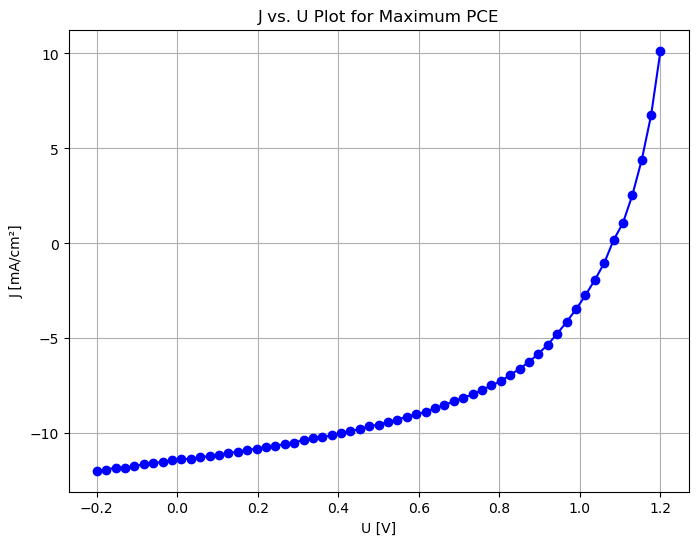

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


max_pce_entry = max(results, key=lambda x: x[2])  
max_pce_file_path = max_pce_entry[0]

df = pd.read_csv(max_pce_file_path, delimiter=r'\s*;\s*', engine='python')
df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']

plt.figure(figsize=(8, 6))
plt.plot(df['U[V]'], df['j[mA/cm^2]'], marker='o', linestyle='-', color='b')
plt.xlabel('U [V]')
plt.ylabel('J [mA/cm²]')
plt.title('J vs. U Plot for Maximum PCE')
plt.grid(True)
plt.show()


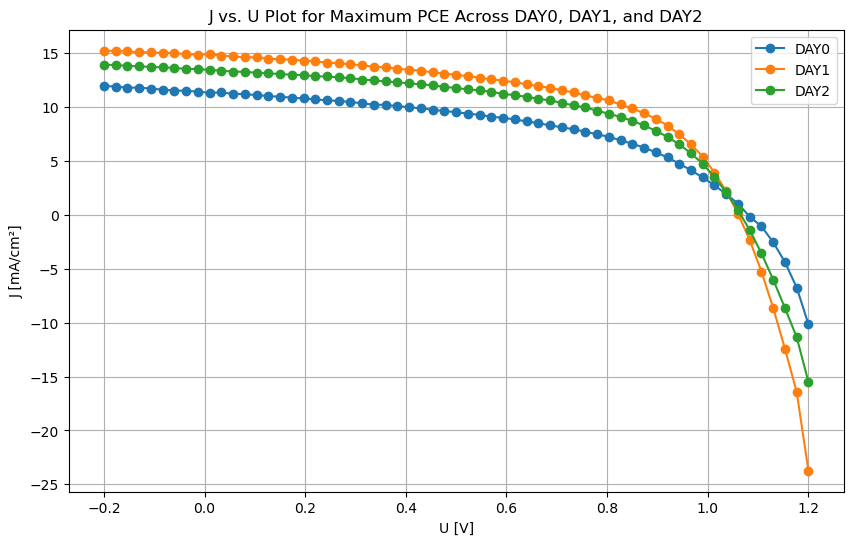

In [19]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

data_by_day = {}

for i in range(3):
    file_pattern = fr"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\DAY{i}\REF*.dat"
    file_paths = glob.glob(file_pattern)
    
    max_pce = None
    max_pce_file = None
    
    for file_path in file_paths:
        try:
            
            df = pd.read_csv(file_path, delimiter=r'\s*;\s*', engine='python')
            df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']
            
            
            min_power = df['P[mW/cm^2]'].min()
            pce = (min_power / 1000) * 100 
            
            
            if max_pce is None or pce > max_pce:
                max_pce = pce
                max_pce_file = file_path
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")
    
    if max_pce_file:
        df = pd.read_csv(max_pce_file, delimiter=r'\s*;\s*', engine='python')
        df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']
        df['j[mA/cm^2]'] *= -1
        data_by_day[f'DAY{i}'] = df

plt.figure(figsize=(10, 6))
for day, df in data_by_day.items():
    plt.plot(df['U[V]'], df['j[mA/cm^2]'], marker='o', linestyle='-', label=day)

plt.xlabel('U [V]')
plt.ylabel('J [mA/cm²]')
plt.title('J vs. U Plot for Maximum PCE Across DAY0, DAY1, and DAY2')
plt.legend()
plt.grid(True)
plt.show()


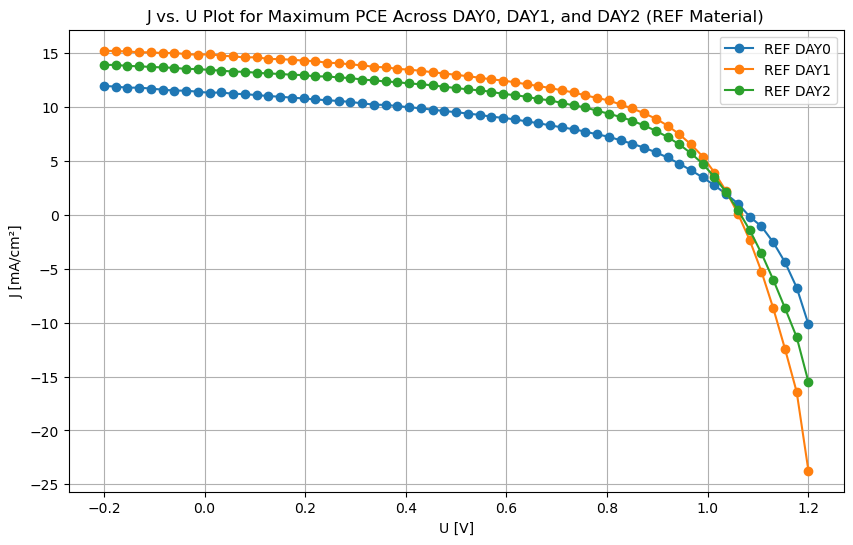

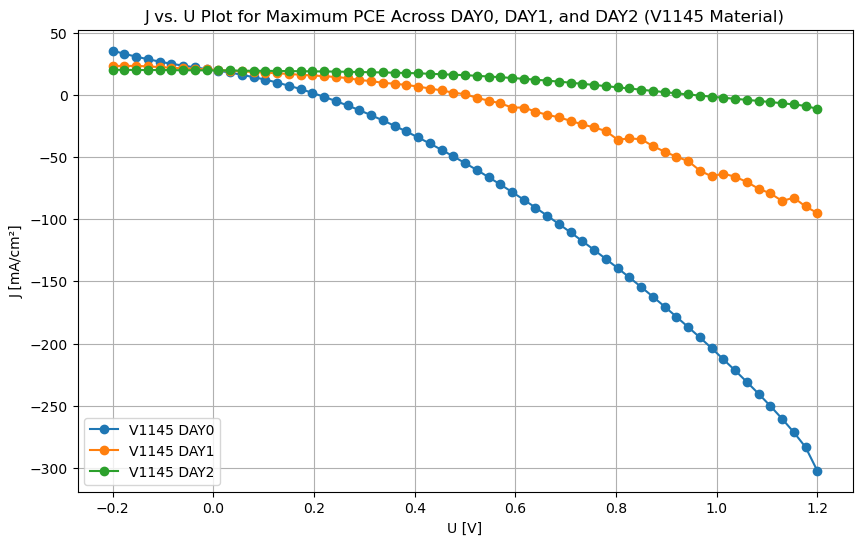

In [20]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

def process_material(material):
    data_by_day = {}


    for i in range(3):
        file_pattern = fr"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\DAY{i}\{material}*.dat"
        file_paths = glob.glob(file_pattern)
        
        max_pce = None
        max_pce_file = None
        
        for file_path in file_paths:
            try:
                
                df = pd.read_csv(file_path, delimiter=r'\s*;\s*', engine='python')
                df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']
                
                min_power = df['P[mW/cm^2]'].min()
                pce = (min_power / 1000) * 100
                
                
                if max_pce is None or pce > max_pce:
                    max_pce = pce
                    max_pce_file = file_path
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")
        
        if max_pce_file:
            df = pd.read_csv(max_pce_file, delimiter=r'\s*;\s*', engine='python')
            df.columns = ['U[V]', 'I[A]', 'j[mA/cm^2]', 'P[mW/cm^2]']
            df['j[mA/cm^2]'] *= -1
            data_by_day[f'DAY{i}'] = df

    return data_by_day

ref_data_by_day = process_material("REF")

v1145_data_by_day = process_material("V1145")

plt.figure(figsize=(10, 6))
for day, df in ref_data_by_day.items():
    plt.plot(df['U[V]'], df['j[mA/cm^2]'], marker='o', linestyle='-', label=f'REF {day}')
plt.xlabel('U [V]')
plt.ylabel('J [mA/cm²]')
plt.title('J vs. U Plot for Maximum PCE Across DAY0, DAY1, and DAY2 (REF Material)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for day, df in v1145_data_by_day.items():
    plt.plot(df['U[V]'], df['j[mA/cm^2]'], marker='o', linestyle='-', label=f'V1145 {day}')
plt.xlabel('U [V]')
plt.ylabel('J [mA/cm²]')
plt.title('J vs. U Plot for Maximum PCE Across DAY0, DAY1, and DAY2 (V1145 Material)')
plt.legend()
plt.grid(True)
plt.show()
